In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib.patches import RegularPolygon
import matplotlib.patches as mpatches
from matplotlib import cm
import numpy as np
from highlight_text import fig_text, ax_text
from ast import literal_eval

from mplsoccer import Pitch, VerticalPitch, lines, add_image

from PIL import Image
import urllib
import os
import glob
from urllib.request import urlopen

from matplotlib.markers import MarkerStyle
from collections import Counter
from sklearn.cluster import KMeans

In [2]:
font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if (y.split(".")[-1] == "ttf") or (y.split(".")[-1] == "otf"):
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("soc_base.mplstyle")
# plt.rcParams['font.family'] = 'DM Sans'

In [3]:
red = '#cb2217'
blue = '#00285e'
sky_blue = '#6caddf'
bg_color= '#fffcf7'
gold = '#ffc758'

In [21]:
path = r'C:\Users\MIRIRAI\Documents\Joel\Analisis-de-fulbo-main\WSL24-25' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
fotmob = pd.read_csv('fotmob.csv')
df = pd.merge(left=data, right=fotmob, left_on='teamName', right_on='club', how='left')

In [22]:
df = df[(df['type'] == 'Pass') & (~df['qualifiers'].str.contains('Chipped')) & (~df['qualifiers'].str.contains('Corner'))]

half_space_passes = ((df['x'] >= 88.54) & (df['x'] <= 105) & 
                       ((df['y'] >= 40.8) & (df['y'] <= 54.4) | (df['y'] >= 13.6) & (df['y'] <= 27.2)) & 
                       (df['endY'] >= 27.2) & (df['endY'] <= 40.8) & (df['endX'] >= 81.67))

data = df[half_space_passes]

In [23]:
#making my uefa data fit opta pitch dimensions
data['x'] = data['x']/1.05
data['y'] = data['y']/0.68
data['endX'] = data['endX']/1.05
data['endY'] = data['endY']/0.68
data['goalMouthY'] = data['goalMouthY']/0.68

C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\3620910844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x'] = data['x']/1.05
C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\3620910844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = data['y']/0.68
C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\3620910844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [24]:
data['is_assist'] = data['qualifiers'].str.contains('GoalAssist')
data['is_key_pass'] = data['qualifiers'].str.contains('KeyPass')

C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\1401349214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_assist'] = data['qualifiers'].str.contains('GoalAssist')
C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\1401349214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_key_pass'] = data['qualifiers'].str.contains('KeyPass')
C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\1401349214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [8]:
test_df = data[(data['teamName'] == 'Manchester City Women')]

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

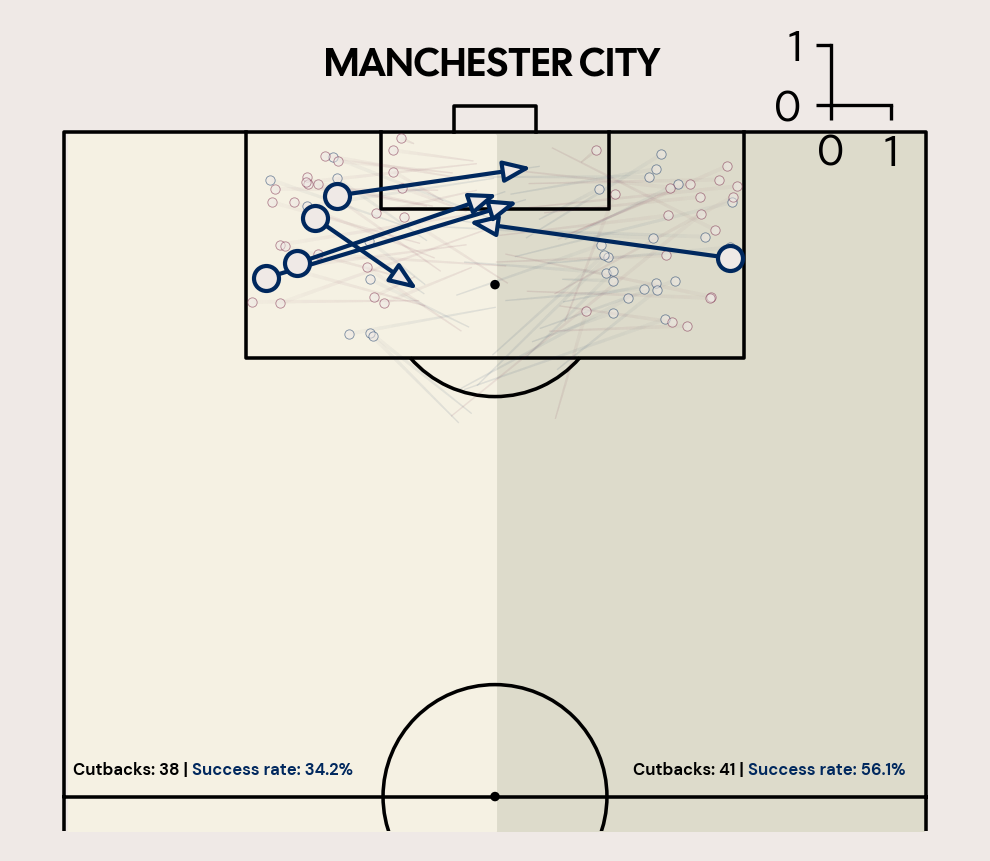

In [9]:
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='black',
    half=True
)
pitch.draw(ax = ax)

# -- Split successful corners from unsuccessful attempts.
assists = test_df[test_df['is_assist'] == True]
others = test_df[test_df['is_assist'] != True]
other_s = test_df[test_df['outcomeType'] == 'Successful']
other_u = test_df[test_df['outcomeType'] != 'Successful']

lines(other_s.y, other_s.x, other_s.endY, other_s.endX, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color=blue)

lines(other_u.y, other_u.x, other_u.endY, other_u.endX, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color='#70163C')

for index, a in assists.iterrows():
    # ax.plot([a['y'], a['end_y']], [a['x'], a['end_x']], lw=1, color='#307351')
    pass_arrow = mpatches.FancyArrowPatch((a.y, a.x), (a.endY, a.endX), ec=blue,
                                        fc='#efe9e6',arrowstyle='-|>,head_length=5.6,head_width=2.2', zorder=4)
    ax.add_patch(pass_arrow)

ax.scatter(assists['y'], assists['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=4)
ax.scatter(other_s['y'], other_s['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=3, alpha=.5, s=5, lw=0.2)
ax.scatter(other_u['y'], other_u['x'], marker='o', fc=ax.get_facecolor(), ec='#70163C', zorder=3, alpha=.5, s=5, lw=0.2)

# Separate left from right hand side
# -- Count which side had most crosses:
left_side = test_df[test_df['y'] > 50].shape[0]
right_side = test_df[test_df['y'] < 50].shape[0]
left_success = other_s[other_s['y'] > 50].shape[0]
right_success = other_s[other_s['y'] < 50].shape[0]

if right_side > left_side:
    color_left = '#F5F1E3'
    color_right = '#DDDBCB'
else:
    color_right = '#F5F1E3'
    color_left = '#DDDBCB'

ax.fill_between(
    x=[0.35,50], y1=ax.get_ylim()[0], y2=99.65,
    color=color_right, zorder=-1
)
ax.fill_between(
    x=[99.35,50], y1=ax.get_ylim()[0], y2=99.65,
    color=color_left, zorder=-1
)

# -- Annotations
ax_text(
    x=99, y=52,
    s=f'Cutbacks: {left_side:.0f} | <Success rate: {left_success/left_side:.1%}>',
    ha='left', va='center',
    weight='bold', textalign='top',
    highlight_textprops=[{'color':blue}],
    size=4,
    ax=ax
)

ax_text(
    x=34, y=52,
    s=f'Cutbacks: {right_side:.0f} | <Success rate: {right_success/right_side:.1%}>',
    ha='left', va='center',
    weight='bold', textalign='top',
    highlight_textprops=[{'color':blue}],
    size=4,
    ax=ax
)

ax.annotate(
    xy=(50,105),
    text=f"{test_df['teamName'].iloc[0].upper().replace("WOMEN", "")}",
    size=9.5,
    color='black',
    family="Cal Sans",
    ha='center',
    va='center',
    weight='bold',
    annotation_clip=False
)


# -- Add Logo
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
ax_coords = DC_to_NFC((11,102))
ax_size = 0.05
image_ax = fig.add_axes(
    [ax_coords[0], ax_coords[1], ax_size, ax_size],
    fc='None'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{test_df["fotmob_id"].iloc[0]:.0f}.png')).convert('LA')
image_ax.imshow(club_icon)
image_ax.axis('off')

In [ ]:
def plot_crosses_by_team_name(ax, team_name):

    plot_df = data[(data['teamName'] == team_name)]

    pitch = VerticalPitch(
        pitch_type='opta',
        goal_type='box',
        linewidth=.85,
        line_color='black',
        half=True
    )
    pitch.draw(ax = ax)

    # -- Split successful corners from unsuccessful attempts.
    assists = plot_df[plot_df['is_assist'] == True]
    others = plot_df[plot_df['is_assist'] != True]
    other_s = plot_df[plot_df['outcomeType'] == 'Successful']
    other_u = plot_df[plot_df['outcomeType'] != 'Successful']

    lines(other_s.y, other_s.x, other_s.endY, other_s.endX, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.08, lw=.4, transparent=True, color=blue)

    lines(other_u.y, other_u.x, other_u.endY, other_u.endX, 
        ax=ax, comet=True, alpha_start=0.01, alpha_end=0.08, lw=.4, transparent=True, color='#70163C')

    for index, a in assists.iterrows():
        # ax.plot([a['y'], a['end_y']], [a['x'], a['end_x']], lw=1, color='#307351')
        pass_arrow = mpatches.FancyArrowPatch((a.y, a.x), (a.endY, a.endX), ec=blue,
                                            fc='#efe9e6',arrowstyle='-|>,head_length=5.6,head_width=2.2', zorder=4)
        ax.add_patch(pass_arrow)

    ax.scatter(assists['y'], assists['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=4)
    ax.scatter(other_s['y'], other_s['x'], marker='o', fc=ax.get_facecolor(), ec=blue, zorder=3, alpha=.6, s=7, lw=0.3)
    ax.scatter(other_u['y'], other_u['x'], marker='o', fc=ax.get_facecolor(), ec='#70163C', zorder=3, alpha=.6, s=7, lw=0.3)


    # Separate left from right hand side
    # -- Count which side had most crosses:
    left_side = plot_df[plot_df['y'] > 50].shape[0]
    right_side = plot_df[plot_df['y'] < 50].shape[0]
    left_success = other_s[other_s['y'] > 50].shape[0]
    right_success = other_s[other_s['y'] < 50].shape[0]

    if right_side > left_side:
        color_left = '#F5F1E3'
        color_right = '#DDDBCB'
    else:
        color_right = '#F5F1E3'
        color_left = '#DDDBCB'


    ax.fill_between(
        x=[0.35,50], y1=ax.get_ylim()[0], y2=99.65,
        color=color_right, zorder=-1
    )
    ax.fill_between(
        x=[99.35,50], y1=ax.get_ylim()[0], y2=99.65,
        color=color_left, zorder=-1
    )

    # -- Annotations
    ax_text(
        x=97, y=55,
        s=f'Cutbacks: {left_side:.0f}\n<Success (%): {left_success/left_side:.1%}>',
        ha='left', va='center',
        weight='bold', textalign='top',
        highlight_textprops=[{'color':'#307351'}],
        size=6,
        ax=ax
    )

    ax_text(
        x=36, y=55,
        s=f'Cutbacks: {right_side:.0f}\n<Success (%): {right_success/right_side:.1%}>',
        ha='left', va='center',
        weight='bold', textalign='top',
        highlight_textprops=[{'color':'#307351'}],
        size=7,
        ax=ax
    )

    ax.annotate(
        xy=(50,108),
        text=f"{plot_df['teamName'].iloc[0].upper().replace("WOMEN", "")}",
        size=11.5,
        color='black',
        family="Cal Sans",
        ha='center',
        va='center',
        weight='bold',
        annotation_clip=False
    )

    return ax

In [ ]:
order_teams = data.groupby(['teamName', 'fotmob_id'])['is_assist'].sum().reset_index().sort_values(by='is_assist', ascending=False).reset_index(drop=True)
order_teams

In [26]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18,18), dpi=600)
axs = np.array(axs)
for index, ax in enumerate(axs.reshape(-1)):
    plot_crosses_by_team_name(ax, order_teams['teamName'].iloc[index])

plt.subplots_adjust(wspace=0, hspace=-.35)
# We add the logos once we've reshaped the figure
for index, ax in enumerate(axs.reshape(-1)):
    # -- Transformation functions
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take data coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((14,89))
    ax_size = 0.017
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{order_teams["fotmob_id"].iloc[index]:.0f}.png')).convert('LA')
    image_ax.imshow(club_icon)
    image_ax.axis('off')



fig_text(
    x = 0.42, y = .85, 
    s = "Where do cutbacks come from in the Barclays WSL?",
    va = "bottom", ha = "center",
    fontsize = 30, color = "black", font = "Cal Sans", weight = "bold"
)
fig_text(
	x = 0.41, y = .83, 
    s = "Cutbacks for Barclays WSL teams, <arrows denote assists> | Season 24/25 | viz by @woso_analytics",
    highlight_textprops=[{"weight": "bold", "color": blue}],
	va = "bottom", ha = "center",
	fontsize = 14, color = "#4E616C", font = "DM Sans"
)

plt.savefig(
	"../figures/07062025_wsl_cutbacks.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"../figures/070642025_wsl_cutbacks_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)

In [94]:
 # Group by player and calculate totals
df_grouped = data.groupby(['shortName', 'teamName']).agg(
        xT=('xT', 'sum'),
        assists=('is_assist', 'sum'), 
        cutback_chances=('is_key_pass', 'sum'), 
        total_cutbacks=('is_key_pass', 'count'),
    ).reset_index()

df_grouped

shortName                 teamName        xT  assists  \
0    A. Beever-Jones         Chelsea FC Women  0.268914        0   
1         A. Bernabe         Chelsea FC Women  0.053140        0   
2       A. Blanchard  Crystal Palace FC Women  0.043625        0   
3           A. Csiki  Tottenham Hotspur Women -0.005557        0   
4          A. Denton    West Ham United Women  0.000000        0   
..               ...                      ...       ...      ...   
157        V. Asseyi    West Ham United Women  0.236653        1   
158       V. Miedema    Manchester City Women  0.043625        0   
159        V. Pelova            Arsenal Women  0.000000        0   
160       W. Kaptein         Chelsea FC Women  0.000000        0   
161      Y. Hasegawa    Manchester City Women  0.000000        0   

     cutback_chances  total_cutbacks  
0                  3               9  
1                  0               1  
2                  0               4  
3                  0               1  
4                  0               1  
..               ...             ...  
157                2               3  
158                1               3  
159                0               1  
160                0               1  
161                0               1  

[162 rows x 6 columns]

In [95]:
df_grouped = df_grouped[df_grouped['total_cutbacks'] > 4]
df_grouped['teamName'] = df_grouped.teamName.apply(lambda x: x.replace("Women", ""))
df_grouped['teamName'] = df_grouped.teamName.apply(lambda x: x.replace("WFC", ""))
df_grouped['teamName'] = df_grouped.teamName.apply(lambda x: x.replace("FC", ""))
df_grouped['teamName'] = df_grouped.teamName.apply(lambda x: x.replace("& Hove Albion", ""))
df_grouped = df_grouped.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, float) else x)

C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\369549047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['teamName'] = df_grouped.teamName.apply(lambda x: x.replace("Women", ""))
C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\369549047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['teamName'] = df_grouped.teamName.apply(lambda x: x.replace("WFC", ""))
C:\Users\MIRIRAI\AppData\Local\Temp\ipykernel_10908\369549047.py:4: SettingWithCopyWarning: 
A value is trying to be

In [96]:
df_grouped = df_grouped.sort_values(by='total_cutbacks', ascending=False).reset_index(drop=True)

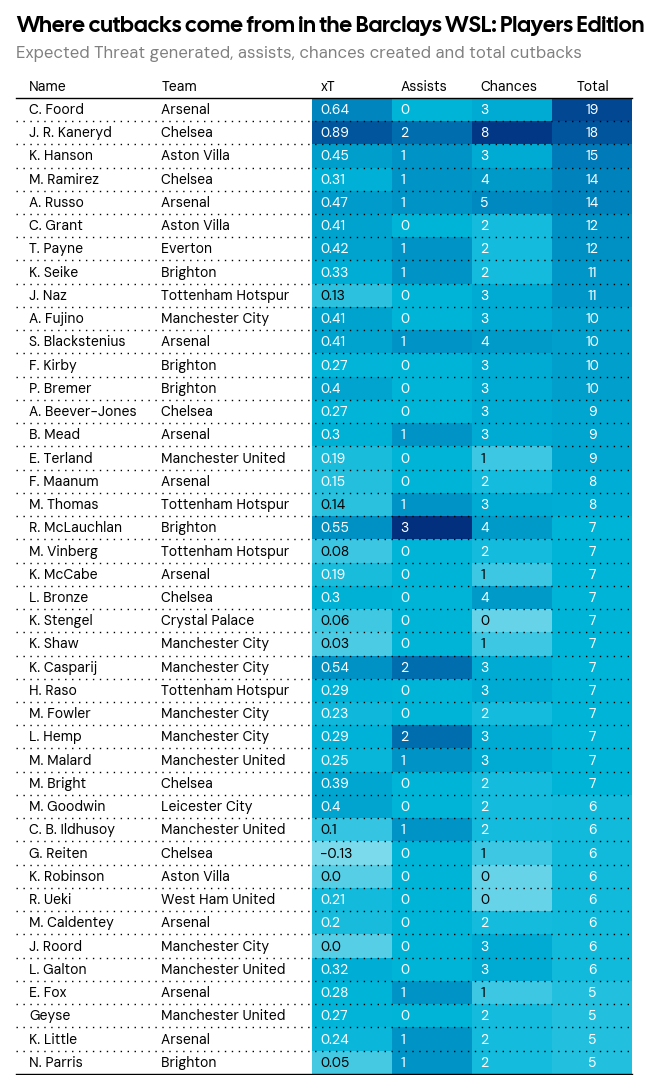

In [100]:
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
import matplotlib.colors as mcolors

gradient = [
    "#caf0f8",
    "#ade8f4",
    "#90e0ef",
    "#48cae4",
    "#00b4d8",
    "#0096c7",
    "#0077b6",
    "#023e8a",
    "#03045e",
]


# soc_cm = LinearSegmentedColormap.from_list('SOC', gradient, N=50)
# # cm.register_cmap(name='SOC', cmap=soc_cm)
# colormaps.register(name='SOC', cmap=soc_cm)

# cmap = plt.get_cmap('SOC')
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=gradient, N=256
)

bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text
df_grouped.columns = ["Name", "Team", "xT", "Assists", "Chances", "Total"]
# my_norm=mcolors.Normalize(vmin=city['KP from Cutbacks'].min(), vmax=city['KP from Cutbacks'].max()) 
col_defs = [
    ColumnDefinition(
        name="Name",
        textprops={"ha": "left"},
        width=1.6,
        ),
    ColumnDefinition(
        name="Team",
        textprops={"ha": "left"},
        width=2.1,
    ),
    ColumnDefinition(
        name="xT",
        textprops={"ha": "left", "color": "#000000"},
        cmap=normed_cmap(df_grouped["xT"], cmap=cmap, num_stds=5),

    ),
    ColumnDefinition(
        name="Assists",
        textprops={"ha": "left", "color": "#000000"},
        cmap=normed_cmap(df_grouped["Assists"], cmap=cmap, num_stds=5),

    ),
 
    ColumnDefinition(
        name="Chances",
        textprops={"ha": "left", "color": "#000000"},
        cmap=normed_cmap(df_grouped["Chances"], cmap=cmap, num_stds=5),

    )
    ,
    ColumnDefinition(
        name="Total",
        textprops={"ha": "center", "color": "#000000"},
        cmap=normed_cmap(df_grouped["Total"], cmap=cmap, num_stds=5),

    )
    ]

fig, ax = plt.subplots(figsize=(8, 13))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
        df_grouped,
        column_definitions=col_defs,
        index_col="Name",
        row_dividers=True,
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 4))},
        footer_divider=True,
        textprops={"fontsize": 10},
        col_label_divider_kw={"linewidth": 1},
        column_border_kw={"linewidth": 3},
    ).autoset_fontcolors(colnames=["Name", "Team", "xT", "Assists", "Chances", "Total"]) # This will set the font color of the columns based on the cmap so the text is readable

fig_text(
    x = 0.52, y = .91, 
    s = "Where cutbacks come from in the Barclays WSL: Players Edition",
    va = "bottom", ha = "center",
    fontsize = 16, color = "black", font = "Cal Sans", weight = "bold"
)
fig_text(
    x = 0.48, y = .89, 
    s = "Expected Threat generated, assists, chances created and total cutbacks",
    va = "bottom", ha = "center",
    fontsize = 12, color = "gray", font = "DM Sans",
)

plt.savefig(
	"../figures/07062025_wsl_cutback_kp.png",
	dpi = 600,
	facecolor = bg_color,
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)
